In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import Perceptron

In [2]:
df=pd.read_csv("winequality-red.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [6]:
perceptron=Perceptron()

In [7]:
perceptron.fit(x_train,y_train)

Perceptron()

In [8]:
y_pred=perceptron.predict(x_test)

In [10]:
print('Perceptron Learning Accuracy :',accuracy_score(y_test,y_pred))
print("Classification Report :\n",classification_report(y_test,y_pred))

Perceptron Learning Accuracy : 0.434375
Classification Report :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.46      0.95      0.62       130
           6       0.00      0.00      0.00       132
           7       0.31      0.36      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.43       320
   macro avg       0.13      0.22      0.16       320
weighted avg       0.23      0.43      0.29       320



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


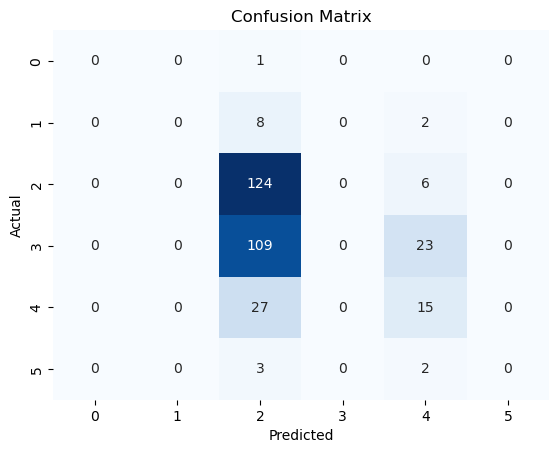

In [11]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cbar=False,fmt='d',cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

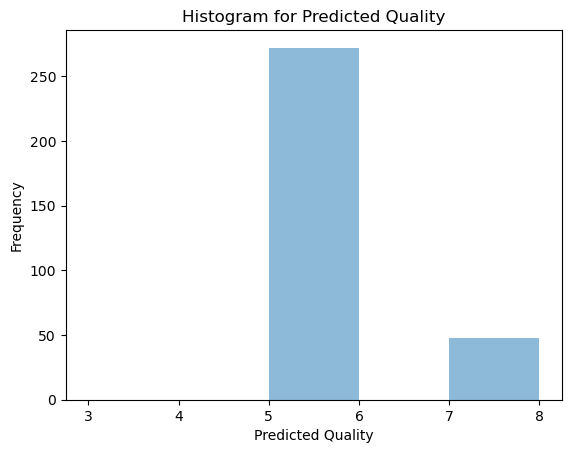

In [12]:
plt.hist(y_pred,bins=range(3,9),alpha=0.5)
plt.xlabel('Predicted Quality')
plt.ylabel('Frequency')
plt.title('Histogram for Predicted Quality')
plt.show()